<a href="https://colab.research.google.com/github/muhammedafsalpm/ICT-Academy-of-Kerala/blob/main/Assignment_on_Model_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [253]:
import pandas as pd
import numpy as np

1. Load the dataset into python environment

In [254]:
df = pd.read_csv('/content/titanic_dataset .csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Do all the necessary pre-processing steps

In [255]:
df.shape

(891, 12)

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [257]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [258]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [259]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [260]:
# Fill Na value
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])

df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [261]:
from matplotlib import pyplot as plt
import seaborn as sns

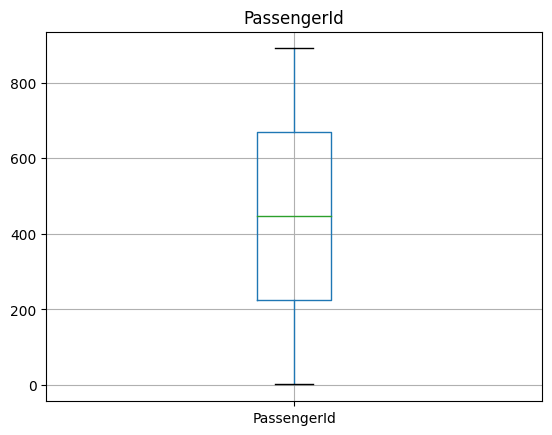

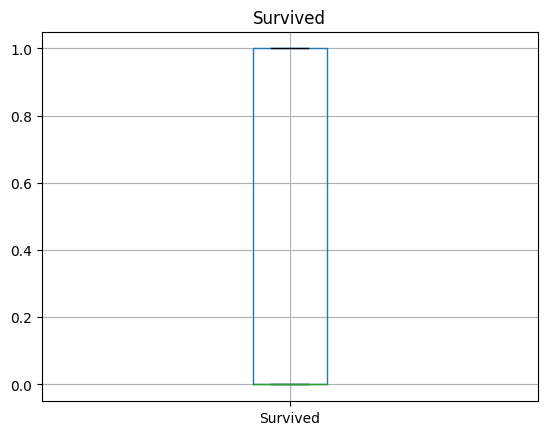

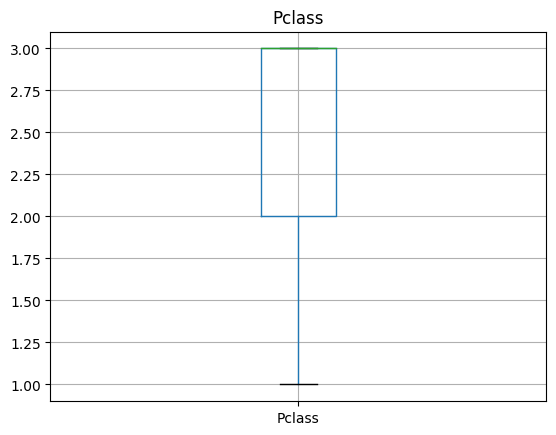

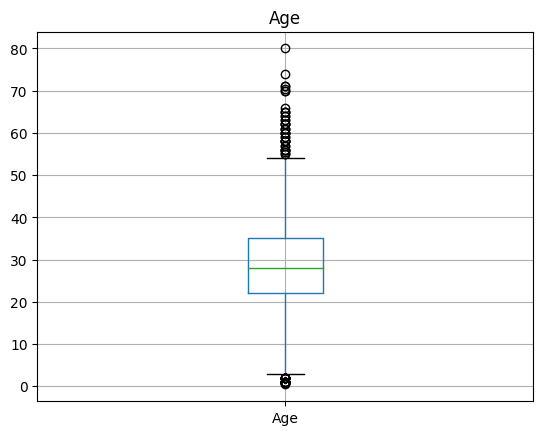

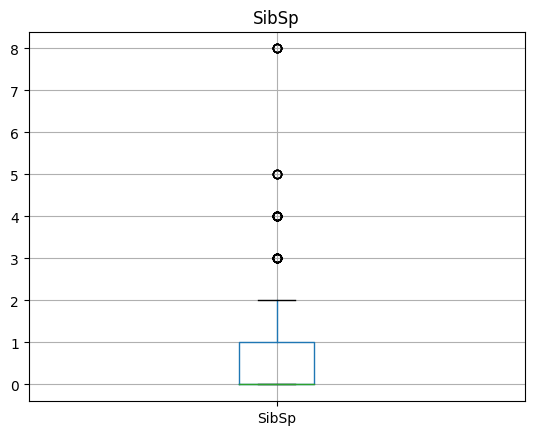

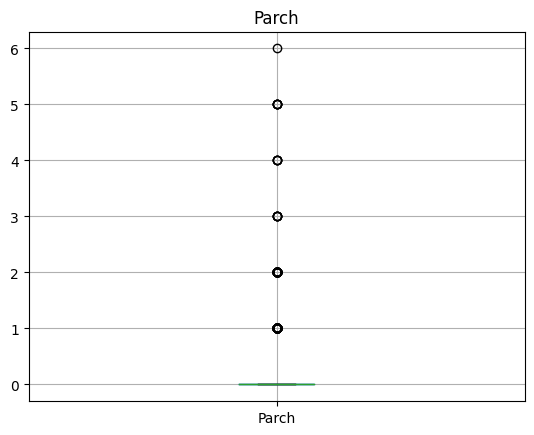

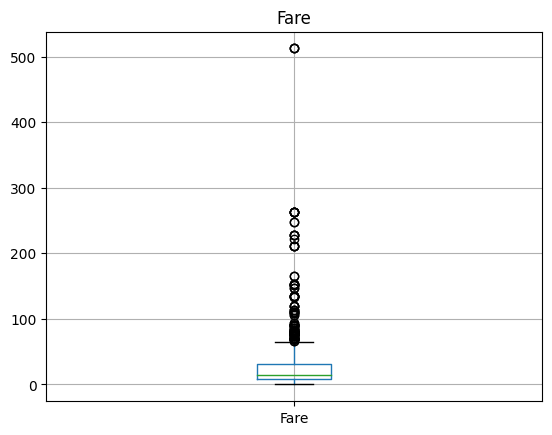

In [262]:
for col in df.columns:
  if df[col].dtype!='object':
    plt.figure()
    df.boxplot(col)
    plt.title(col)
    plt.show()

In [263]:
# To deal Outliers IQR Method

for col in df.columns:
  if df[col].dtype!='object':
    q1 = df[col].quantile(0.25)
    q2 = df[col].quantile(0.75)

    #To find IQR
    iqr = q2-q1

    #Upper Bound & Lower Bound
    upper = q2+1.5*iqr
    lower = q1-1.5*iqr

    df[col] = np.where(df[col]>upper,upper,df[col])
    df[col] = np.where(df[col]<lower,lower,df[col])

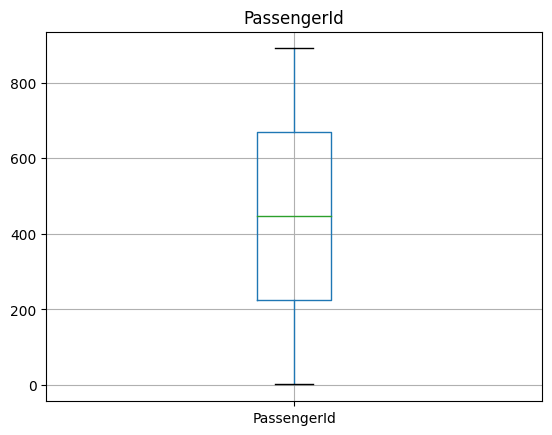

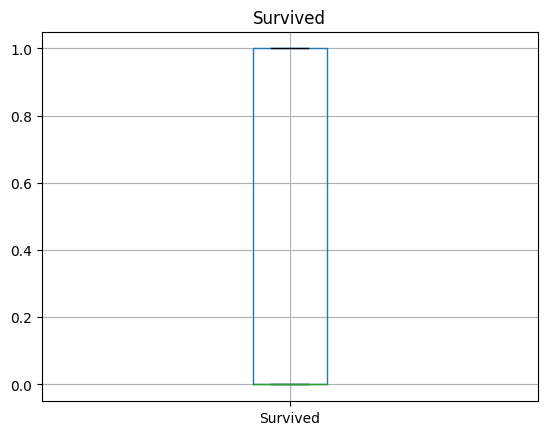

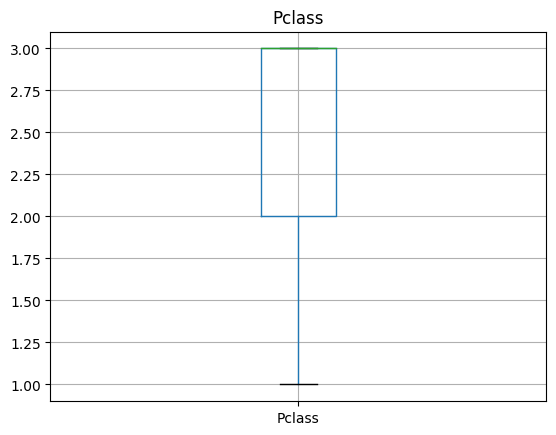

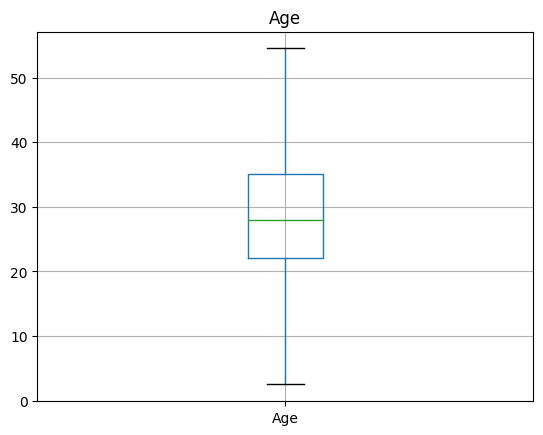

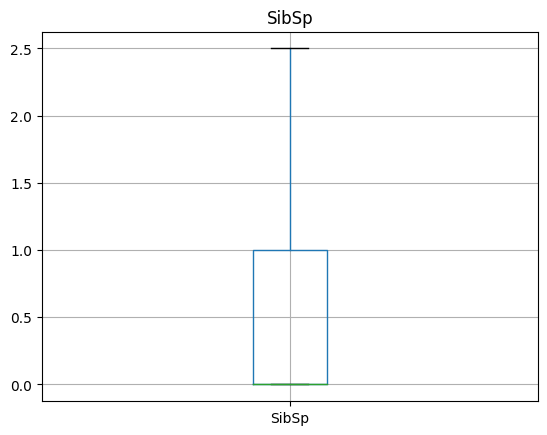

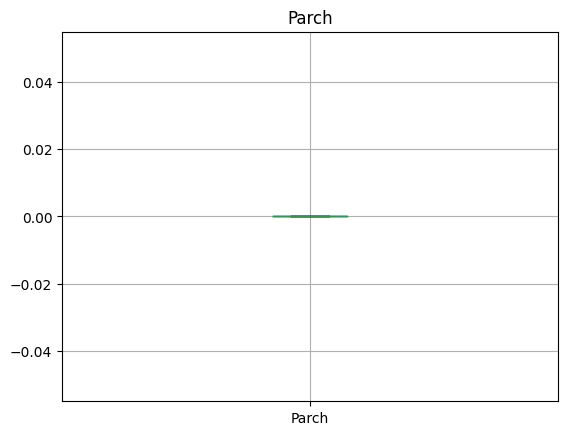

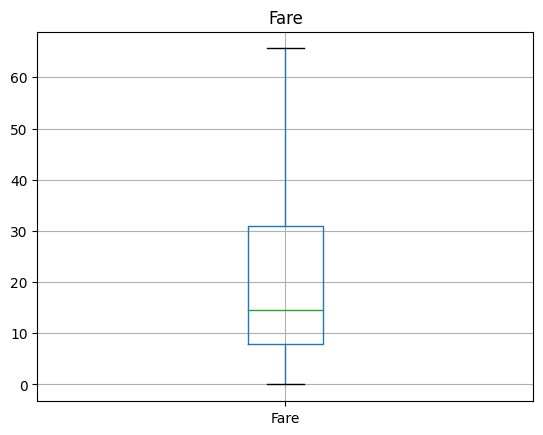

In [264]:
for col in df.columns:   #To get Outliers
  if df[col].dtype!='object':
    plt.figure()
    df.boxplot([col])
    plt.title(col)

In [265]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [266]:
columns_to_scale = ['Age','Fare','SibSp','Parch']
for col in columns_to_scale:
  df[col] = scaler.fit_transform(df[[col]])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,-0.583432,0.810220,0.0,A/5 21171,-0.820552,B96 B98,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.742685,0.810220,0.0,PC 17599,2.031623,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,-0.251903,-0.602512,0.0,STON/O2. 3101282,-0.787578,B96 B98,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.494038,0.810220,0.0,113803,1.419297,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,0.494038,-0.602512,0.0,373450,-0.781471,B96 B98,S


In [267]:
# Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['Sex'] = encoder.fit_transform(df['Sex'])
df['Embarked'] = encoder.fit_transform(df['Embarked'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",1,-0.583432,0.810220,0.0,A/5 21171,-0.820552,B96 B98,2
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.742685,0.810220,0.0,PC 17599,2.031623,C85,0
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",0,-0.251903,-0.602512,0.0,STON/O2. 3101282,-0.787578,B96 B98,2
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.494038,0.810220,0.0,113803,1.419297,C123,2
4,5.0,0.0,3.0,"Allen, Mr. William Henry",1,0.494038,-0.602512,0.0,373450,-0.781471,B96 B98,2


In [268]:
 # For prediction split columns
x = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

In [269]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3.0,1,-0.583432,0.810220,0.0,-0.820552,2
1,1.0,0,0.742685,0.810220,0.0,2.031623,0
2,3.0,0,-0.251903,-0.602512,0.0,-0.787578,2
3,1.0,0,0.494038,0.810220,0.0,1.419297,2
4,3.0,1,0.494038,-0.602512,0.0,-0.781471,2


In [270]:
y.head()

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0


In [271]:
#Data Spliting

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [272]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((712, 7), (179, 7), (712,), (179,))

3. Create kNN and SVM models

K-Nearest Neighbour

In [273]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [274]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15) #to find best kvalue
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  metric_k.append(acc)

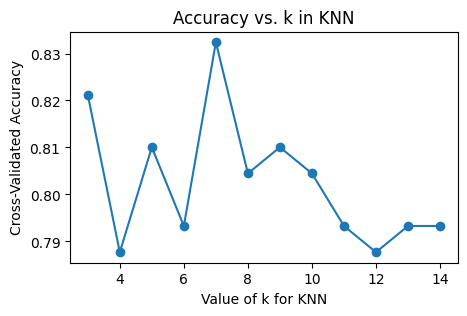

Best k value: 7 with accuracy: 0.832


In [275]:
# Plot the k values vs. accuracy
plt.figure(figsize=(5, 3))
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Accuracy vs. k in KNN')
plt.show()

# Find the best k value
best_k = neighbors[np.argmax(metric_k)]
print(f"Best k value: {best_k} with accuracy: {max(metric_k):.3f}")

In [276]:
  classifier = KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2) # Here apply k value as 7
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_pred)

In [277]:
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision (macro):', precision_score(y_test, y_pred, average='macro'))
print('Recall (macro):', recall_score(y_test, y_pred, average='macro'))
print('F1 Score (macro):', f1_score(y_test, y_pred, average='macro'))

Accuracy is 0.8324022346368715
Precision (macro): 0.8291612057667104
Recall (macro): 0.8232303732303732
F1 Score (macro): 0.8257398753894081


SVM

In [278]:
from sklearn.svm import SVC
sv_clf = SVC()
sv_clf.fit(x_train,y_train)
y_pred = sv_clf.predict(x_test)

In [279]:
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision (macro):', precision_score(y_test, y_pred, average='macro'))
print('Recall (macro):', recall_score(y_test, y_pred, average='macro'))
print('F1 Score (macro):', f1_score(y_test, y_pred, average='macro'))

Accuracy is 0.8044692737430168
Precision (macro): 0.8003952569169961
Recall (macro): 0.7934362934362934
F1 Score (macro): 0.7962270287851684


4. Do k-fold and stratified stratified k-fold cross validation techniques and find the
average accuracy score of the models

K Fold Cross Validation

In [280]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline

In [282]:
# Define the models
knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
svm = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

# Define the number of folds
num_folds = 10

# k-Fold Cross-Validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Stratified k-Fold Cross-Validation
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Calculate cross-validation scores
def get_avg_accuracy(model, X, y, cv):
    scores = cross_val_score(model, x, y, cv=cv, scoring='accuracy')
    return np.mean(scores)

# k-Fold Cross-Validation Accuracy
knn_kf_accuracy = get_avg_accuracy(knn, x, y, kf)
svm_kf_accuracy = get_avg_accuracy(svm, x_train, y, kf)

# Stratified k-Fold Cross-Validation Accuracy
knn_skf_accuracy = get_avg_accuracy(knn, x, y, skf)
svm_skf_accuracy = get_avg_accuracy(svm, x, y, skf)

print(f'kNN k-Fold Accuracy: {knn_kf_accuracy:.4f}')
print(f'SVM k-Fold Accuracy: {svm_kf_accuracy:.4f}')
print(f'kNN Stratified k-Fold Accuracy: {knn_skf_accuracy:.4f}')
print(f'SVM Stratified k-Fold Accuracy: {svm_skf_accuracy:.4f}')


kNN k-Fold Accuracy: 0.7991
SVM k-Fold Accuracy: 0.8249
kNN Stratified k-Fold Accuracy: 0.8047
SVM Stratified k-Fold Accuracy: 0.8271
